In [13]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import cm
from scipy.stats import pearsonr
%pylab inline
import urllib
from pylab import *
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
#支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [14]:
weather = pd.read_csv('weather_data_1960-2018_cleaned.csv')
weather.set_index('日期', inplace=True)
weather.index = pd.to_datetime(weather.index)
weather.head()

,气象站,名称,降雨量,降雪量,最高气温,最低气温,雾,大雾,雷电,冰丸,...,风,大风,薄雾,毛毛雨,冻雨,雨,结冰,下雪,冰雾,极端天气
日期,,,,,,,,,,,,,,,,,,,,,
1950-01-01,USW00094746,"WORCESTER, MA US",0.0,0.00,0.0,40.0,27.0,0.0,0.0,0.0,...,1.0,0.0,,0.0,0.0,0.0,1.0,0.0,0.0,1
1950-01-02,USW00094746,"WORCESTER, MA US",0.0,0.04,0.0,37.0,28.0,1.0,0.0,0.0,...,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1
1950-01-03,USW00094746,"WORCESTER, MA US",0.0,0.27,0.0,51.0,35.0,1.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1
1950-01-04,USW00094746,"WORCESTER, MA US",0.0,0.00,0.0,60.0,50.0,1.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1
1950-01-05,USW00094746,"WORCESTER, MA US",0.0,0.03,0.0,58.0,41.0,1.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [15]:
weather = weather[['降雨量','降雪量','最高气温','最低气温','极端天气']]
weather.head()

,降雨量,降雪量,最高气温,最低气温,极端天气
日期,,,,,
1950-01-01,0.0,0.00,0.0,40.0,1
1950-01-02,0.0,0.04,0.0,37.0,1
1950-01-03,0.0,0.27,0.0,51.0,1
1950-01-04,0.0,0.00,0.0,60.0,1
1950-01-05,0.0,0.03,0.0,58.0,1


In [16]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22734 entries, 1950-01-01 to 2018-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   降雨量     22734 non-null  float64
 1   降雪量     22734 non-null  float64
 2   最高气温    22734 non-null  float64
 3   最低气温    22734 non-null  float64
 4   极端天气    22734 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.0 MB


In [17]:
print(weather.shape)

(22734, 5)


极端天气
0    12375
1    10359
Name: 降雪量, dtype: int64


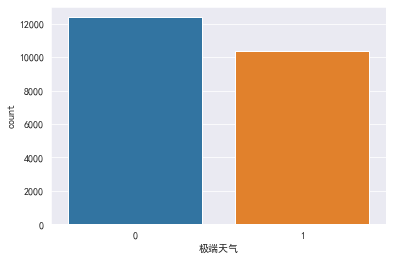

In [18]:
print(weather.groupby(['极端天气']).count()['降雪量'])
sns.countplot(data = weather,x = '极端天气')
plt.show()

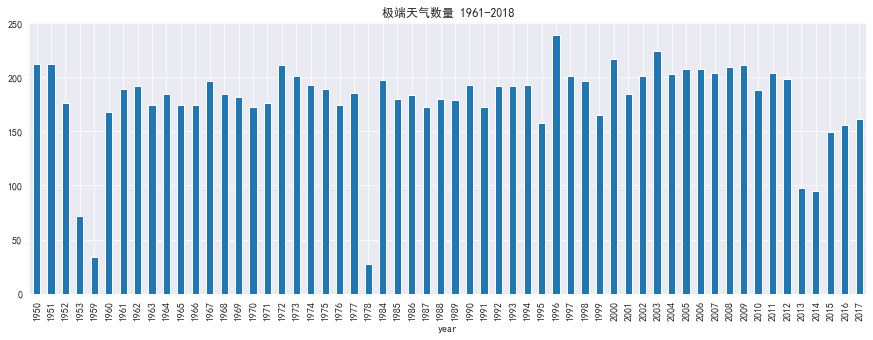

In [19]:
weather['year']= weather.index.year
extreme_weather = weather[weather['极端天气'] == 1].groupby('year').count()['降雪量']
extreme_weather.plot(kind = 'bar', figsize=(15,5))
plt.title('极端天气数量 1961-2018')
plt.show()

In [20]:
weather.groupby('极端天气',as_index = True).agg({'降雨量':'mean','降雪量':'mean','最高气温':'mean','最低气温':'mean'})

,降雨量,降雪量,最高气温,最低气温
极端天气,,,,
0,5.014294,0.031953,0.059160,54.334707
1,6.089997,0.248504,0.298822,57.985037


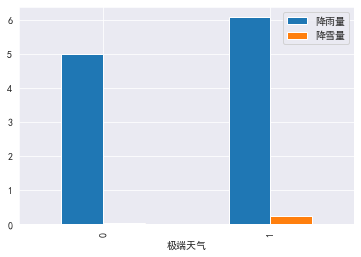

In [21]:
weather.groupby('极端天气',as_index = True).agg({'降雨量':'mean','降雪量':'mean'}).plot(kind = 'bar')
plt.show()

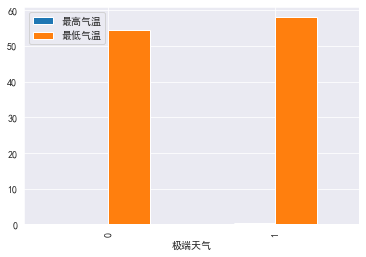

In [22]:
weather.groupby('极端天气',as_index = True).agg({'最高气温':'mean','最低气温':'mean'}).plot(kind = 'bar')
plt.show()

In [23]:
print('The correlation between Precipitation and the Extreme weather is', weather['降雨量'].corr(weather['极端天气']))
print('The correlation between Snowfall and the Extreme weather is', weather['降雪量'].corr(weather['极端天气']))
print('The correlation between Minimum Temprature and the Extreme weather is', weather['最低气温'].corr(weather['极端天气']))
print('The correlation between Maximum Temprature and the Extreme weather is', weather['最高气温'].corr(weather['极端天气']))
print('The correlation between Snowfall and the Precipitation is', weather['降雪量'].corr(weather['降雨量']))


The correlation between Precipitation and the Extreme weather is 0.09246543636604596
The correlation between Snowfall and the Extreme weather is 0.31017591543065487
The correlation between Minimum Temprature and the Extreme weather is 0.09415593643324165
The correlation between Maximum Temprature and the Extreme weather is 0.11774287978540127
The correlation between Snowfall and the Precipitation is 0.01775313347392745


In [ ]:
feature_names = ['降雨量','降雨量','最高气温','最低气温']
X = weather[feature_names]
y = weather['极端天气']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = np.squeeze(y), marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)

plt.suptitle('Scatter-matrix')
plt.savefig('weather_scatter_matrix')